In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Завантаження датасету та виведення перших 5 рядків
dfx = pd.read_csv("Student_data.csv")
dfx.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
# Перевірка розміру датасету
dfx.shape

(2392, 15)

In [4]:
# Визначення назв стовпців
dfx.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [5]:
# Визначення типів стовбців
dfx.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [6]:
# Перевірка на наявність нулів 
dfx.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [7]:
# Перевірка на наявність дублікатів 
dfx.duplicated().sum()

0

In [8]:
# Перетворення категоріальних даних у числові
dfx = pd.get_dummies(dfx, drop_first=True)

# Вибір ознак та цільової змінної 
X = dfx.drop('GradeClass', axis=1)
y = dfx['GradeClass']

# Розподілення даних на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Логістична регресія
log_reg = LogisticRegression(max_iter=1000)
param_grid_log_reg = {'C': [0.1, 1, 10, 100]}
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100]})

In [10]:
# Дерево рішень
tree = DecisionTreeClassifier()
param_grid_tree = {'max_depth': [None, 10, 20, 30]}
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_search_tree.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30]})

In [11]:
# Випадковий ліс
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200]})

In [12]:
# Оцінка моделей
best_model = None
best_accuracy = 0
best_name = ""

models = [grid_search_log_reg, grid_search_tree, grid_search_rf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_name = name
    

Model: Logistic Regression
Accuracy: 0.7098121085594989
Confusion Matrix:
[[  1  16   1   2   2]
 [  4  16  24   1   4]
 [  1  13  50  17   4]
 [  0   3  15  46  22]
 [  0   1   2   7 227]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.17      0.05      0.07        22
         1.0       0.33      0.33      0.33        49
         2.0       0.54      0.59      0.56        85
         3.0       0.63      0.53      0.58        86
         4.0       0.88      0.96      0.92       237

    accuracy                           0.71       479
   macro avg       0.51      0.49      0.49       479
weighted avg       0.68      0.71      0.69       479

Model: Decision Tree
Accuracy: 0.9248434237995825
Confusion Matrix:
[[ 17   3   0   1   1]
 [  0  44   1   1   3]
 [  1   4  74   4   2]
 [  2   3   2  78   1]
 [  1   2   2   2 230]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.77   

In [13]:
print(f"\nBest Model: {best_name} with accuracy: {best_accuracy}")


Best Model: Decision Tree with accuracy: 0.9248434237995825


In [22]:
features = dfx[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]
X_scaled = scaler.fit_transform(features)

In [23]:
wcss = []  # Within-cluster sum of squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

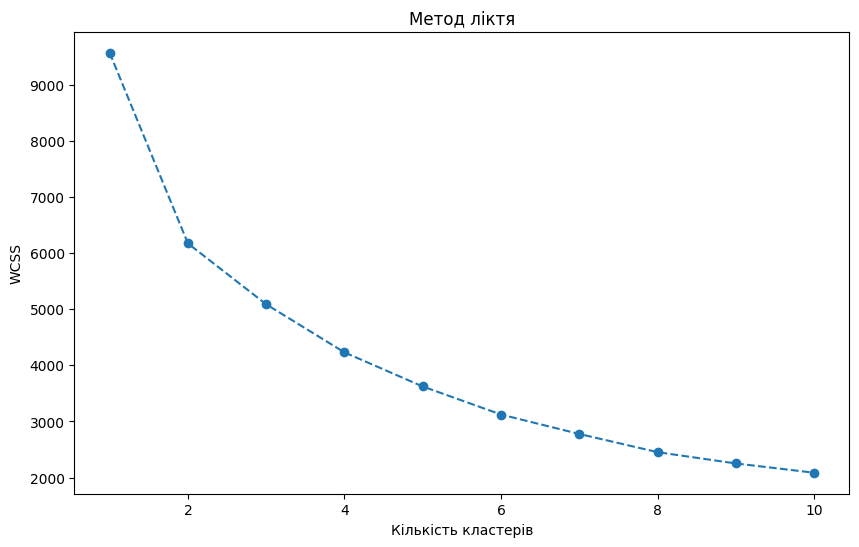

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

In [25]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

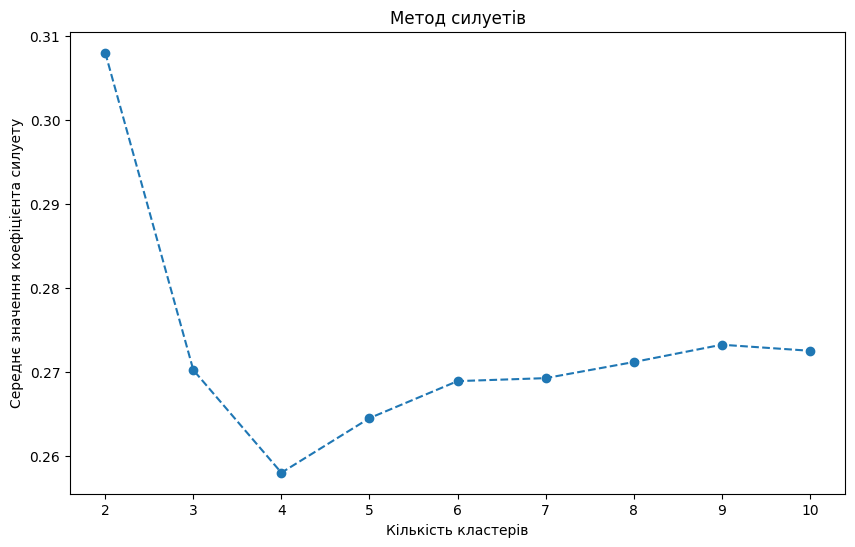

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення коефіцієнта силуету')
plt.show()

In [27]:
def find_elbow(wcss):
    x = range(1, len(wcss) + 1)
    # Обчислення перших похідних
    first_derivative = np.diff(wcss)
    # Обчислення других похідних
    second_derivative = np.diff(first_derivative)
    # Знаходження індексу з найбільшою другою похідною
    optimal_k = np.argmax(second_derivative) + 2  # +2 через зміщення диференціювання
    return optimal_k

optimal_clusters = find_elbow(wcss)
print(f'Оптимальна кількість кластерів за методу ліктя: {optimal_clusters}')
print(f"Оптимальна кількість кластерів за методом силуетів: {np.argmax(silhouette_scores) + 2}")

Оптимальна кількість кластерів за методу ліктя: 2
Оптимальна кількість кластерів за методом силуетів: 2


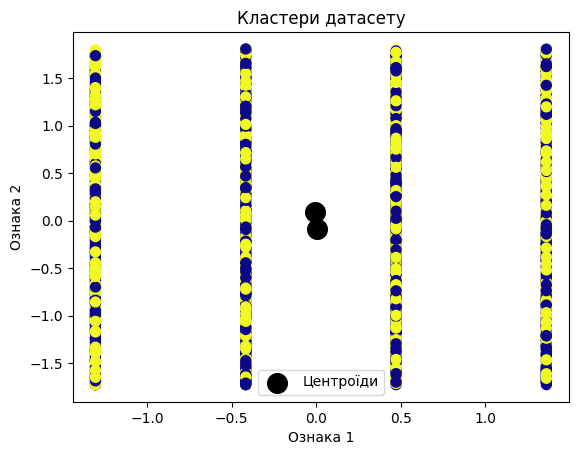

In [36]:
# Виконання кластеризації з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Візуалізація кластерів
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='plasma')
# Візуалізація центроїдів кластерів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Центроїди')
plt.title('Кластери датасету')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend()
plt.show()